<a href="https://colab.research.google.com/github/swaroopkasaraneni/DatasciencePython/blob/main/Supervisor1Case1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.We will use acoustic features to distinguish a male voice from a female. Load the dataset from “voice.csv”,identify the target variable and do a one-hot encoding for the same. Split the dataset intotrain-test with 20% of the data kept aside for testing.[Hint: Refer to LabelEncoder documentation in scikit-learn]

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('voice.csv')

#One-hot encoding for the 'label' column
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])  # Male=0, Female=1

X = df.drop(columns=['label'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("First 5 rows of the training data:")
print(X_train.head())
print("Target labels (y):")
print(y_train.head())

print(f"Label distribution in the training set: {y_train.value_counts()}")


First 5 rows of the training data:
      meanfreq        sd    median       Q25       Q75       IQR      skew  \
807   0.180360  0.053766  0.189474  0.141895  0.213474  0.071579  1.473165   
2495  0.185643  0.065043  0.203955  0.186017  0.223454  0.037437  2.732155   
2529  0.203908  0.045961  0.201869  0.177944  0.239626  0.061682  2.247859   
2241  0.115789  0.081103  0.102197  0.038124  0.193181  0.155057  1.620439   
2981  0.179889  0.067810  0.163096  0.137244  0.246925  0.109681  2.106748   

           kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
807    4.899974  0.918149  0.395065  0.186526  0.180360  0.132277  0.047013   
2495  11.206323  0.898330  0.476308  0.199666  0.185643  0.175833  0.048241   
2529  10.481790  0.898687  0.358451  0.177944  0.203908  0.169617  0.047291   
2241   6.600749  0.962574  0.746873  0.017620  0.115789  0.200910  0.075829   
2981   8.030296  0.932428  0.551025  0.156253  0.179889  0.136662  0.033898   

        maxfun   mean

2.Fit a logistic regression model and measure the accuracy ofthe test set.[Hint:Refer to Linear Models section in scikit-learn]


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression model on test set: {accuracy:.4f}')


Accuracy of Logistic Regression model on test set: 0.9259


3.Compute the correlation matrix that describes the dependence between all predictors and identifiesthe highly correlated predictors.  Plot the correlation matrix using a seaborn heatmap.[Hint: Explore dataframe methods to identify appropriate methods]

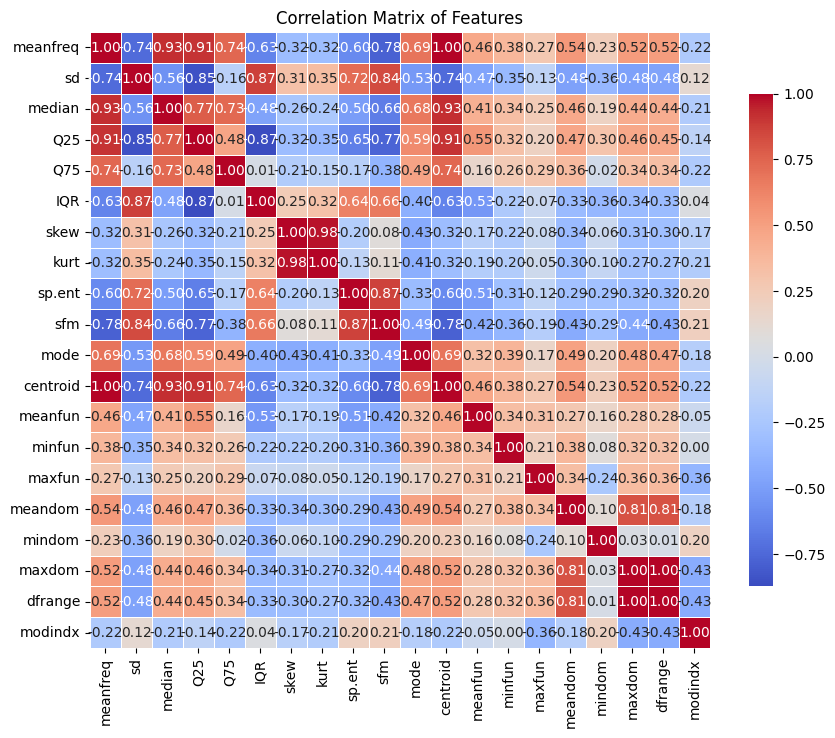

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('voice.csv')
correlation_matrix = df.drop(columns=['label']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': .8})
plt.title('Correlation Matrix of Features')
plt.show()


4.Based on correlation remove those predictors that are correlated and fit a logistic regression model again and compare the accuracy with that of the previous model.[Hint:Identify correlatedvariable pairs and remove one among them]

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('voice.csv')
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

X = df.drop(columns=['label'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
original_accuracy = accuracy_score(y_test, y_pred)

correlation_matrix = X.corr()

#Identify highly correlated pairs (correlation > 0.9 or < -0.9) and remove one variable from each pair
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

#Remove the correlated features from X
X_reduced = X.drop(columns=correlated_features)

#Split the reduced data into train and test sets
X_train_reduced, X_test_reduced = train_test_split(X_reduced, test_size=0.2, random_state=42)

log_reg.fit(X_train_reduced, y_train)
y_pred_reduced = log_reg.predict(X_test_reduced)
reduced_accuracy = accuracy_score(y_test, y_pred_reduced)

print(f"Original model accuracy: {original_accuracy:.4f}")
print(f"Reduced model accuracy: {reduced_accuracy:.4f}")


Original model accuracy: 0.9259
Reduced model accuracy: 0.9196
